# Rental Bikes Customers Prediction
###### Data Source Link: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
## Group 9
#### Members:
- Saloni Bhutada
- Shachi Doshi

## Problem Description

The data gathered is generated by **Capital bikeshare system** based out of **Washington, DC** with the corresponding weather and seasonal information. This information may be utilized to get insights on urban mobility patterns, travel behavior, transit demand and the impact of weather thus to improve bike sharing systems and to influence transportation planning and policy decisions.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Data Description:
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
bike_rental = pd.read_csv("hour.csv")
bike_rental.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis (EDA)

In [3]:
bike_rental.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
bike_rental.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
bike_rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Unique values
bike_rental.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Renaming columns for better understanding

In [7]:
bike_rental = bike_rental.rename(columns={
                       'season': 'Season',
                       'holiday': 'Holiday',
                       'weekday': 'Weekday',
                       'workingday': 'Workingday',
                       'weathersit': 'Weather_Condition',
                       'temp': 'Temperature',
                       'atemp': 'Feels_Like_Temp',
                       'windspeed': 'Windspeed',                  
                       'mnth':'Month',
                       'hr':'Hour',
                       'yr':'Year',
                       'hum':'Humidity',
                       'casual':'Casual_Users',
                       'registered':'Registered_Users',                  
                       'cnt':'Total_Users'})
bike_rental.head()

,instant,dteday,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Feels_Like_Temp,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Users
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Exploratory Data Analysis

##### 1) Let's find the overall description of our dataset

#### Casual Users Distribution

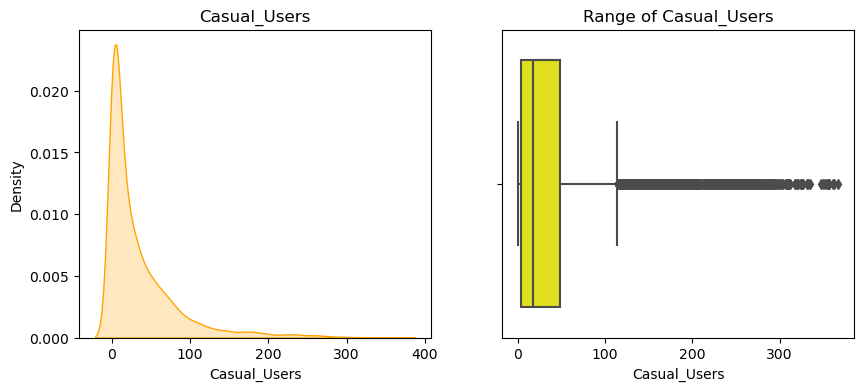

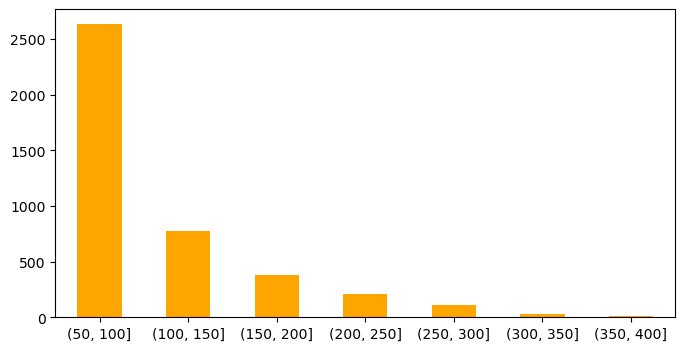

(50, 100]     2635
(100, 150]     778
(150, 200]     380
(200, 250]     211
(250, 300]     110
(300, 350]      26
(350, 400]       8
Name: Casual_Users, dtype: int64

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.kdeplot(data=bike_rental, x="Casual_Users", color="orange",fill=True, ax=axes[0])
sns.boxplot (x=bike_rental.Casual_Users, color='yellow', ax=axes[1])

axes[0]. set_title('Casual_Users')
axes[1].set_title( 'Range of Casual_Users')
plt.show()
grp = pd.cut(bike_rental['Casual_Users'], bins=[50, 100, 150, 200, 250, 300, 350, 400],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(8,4))
plt.show()
print('')
grp.value_counts()

#### Registered Users Distribution

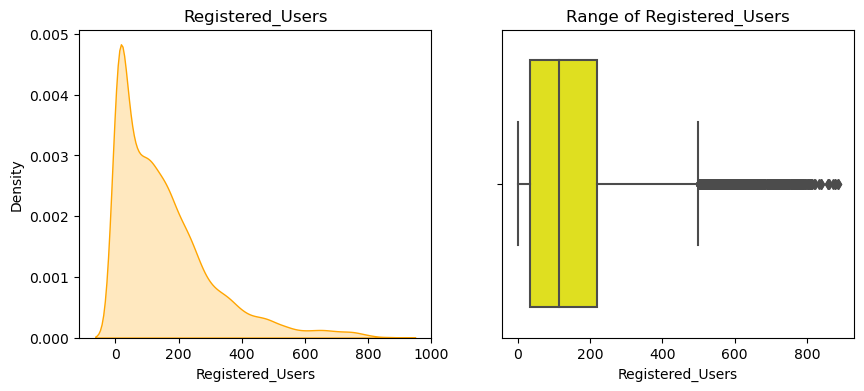

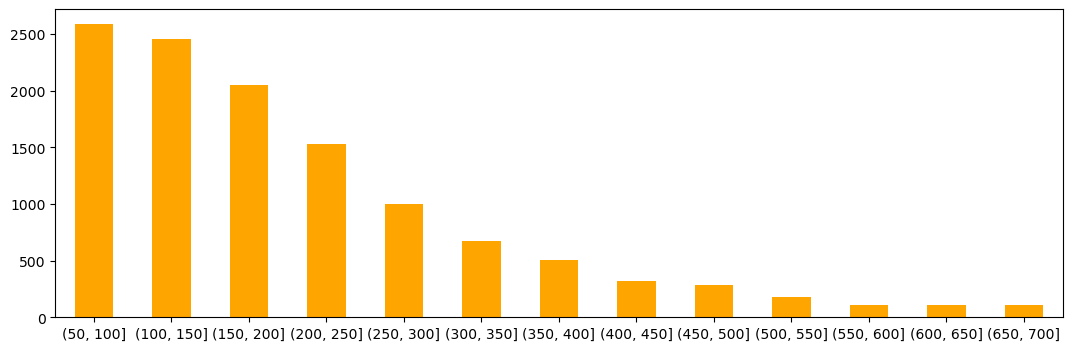

(50, 100]     2590
(100, 150]    2461
(150, 200]    2052
(200, 250]    1530
(250, 300]    1001
(300, 350]     670
(350, 400]     506
(400, 450]     319
(450, 500]     281
(500, 550]     182
(550, 600]     112
(650, 700]     106
(600, 650]     105
Name: Registered_Users, dtype: int64

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.kdeplot(data=bike_rental, x="Registered_Users", color='orange',fill=True, ax=axes[0])
sns.boxplot (x=bike_rental.Registered_Users, color='yellow', ax=axes[1])

axes[0]. set_title('Registered_Users')
axes[1].set_title( 'Range of Registered_Users')
plt.show()
grp = pd.cut(bike_rental['Registered_Users'], bins=[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(13,4))
plt.show()
print('')
grp.value_counts()

#### Total Users Distribution

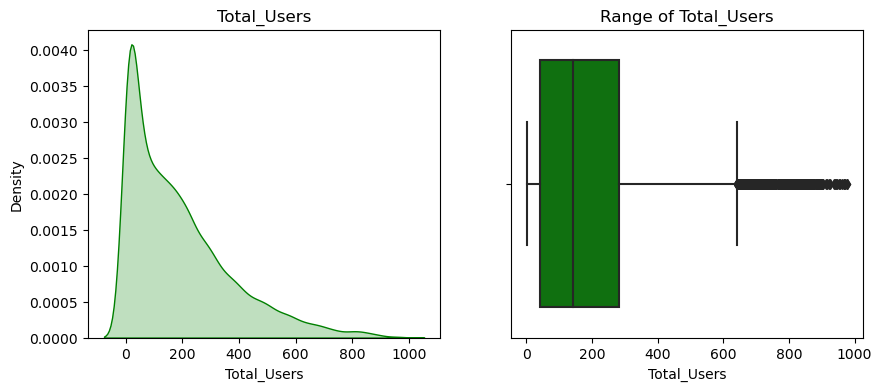

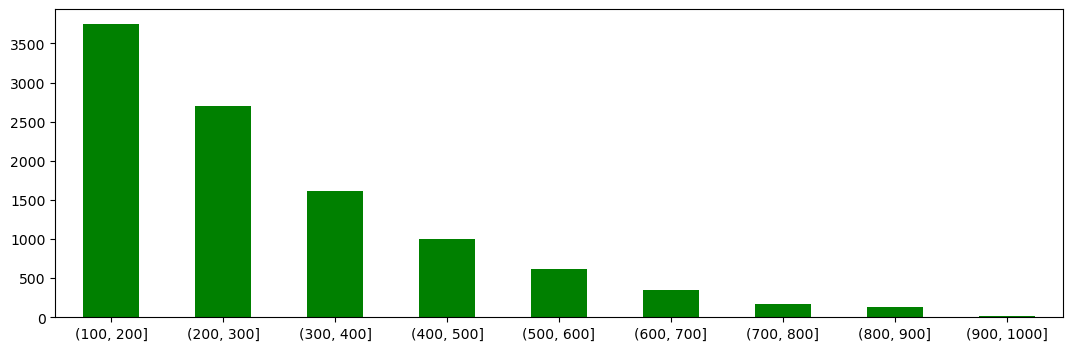

(100, 200]     3749
(200, 300]     2704
(300, 400]     1611
(400, 500]     1001
(500, 600]      614
(600, 700]      345
(700, 800]      173
(800, 900]      129
(900, 1000]      18
Name: Total_Users, dtype: int64

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.kdeplot(data=bike_rental, x="Total_Users", color='green',fill=True, ax=axes[0])
sns.boxplot (x=bike_rental.Total_Users, color='green', ax=axes[1])

axes[0]. set_title('Total_Users')
axes[1].set_title( 'Range of Total_Users')
plt.show()
grp = pd.cut(bike_rental['Total_Users'], bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="green", figsize=(13,4))
plt.show()
print('')
grp.value_counts()

#### a) Yearly Distribution (0: 2011, 1:2012)

[Text(0.5, 1.0, 'Yearly Comparison of Total Bike Rental Users')]

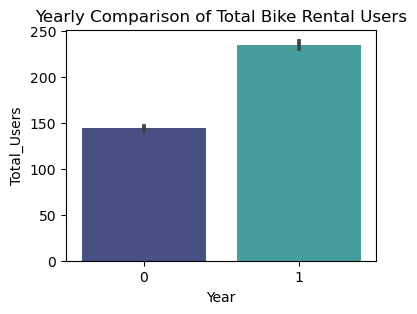

In [11]:
firstyear_userscount = bike_rental[bike_rental.Year == 0].count()['Total_Users']
secondyear_userscount= bike_rental[bike_rental.Year == 1].count()['Total_Users']
firstyear_userscount_ratio = (firstyear_userscount/ (bike_rental.shape[0]))*100
secondyear_userscount_ratio = (secondyear_userscount/bike_rental.shape[0])*100

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(data=bike_rental, x='Year', y='Total_Users', ax=ax, palette = "mako")
ax.set(title='Yearly Comparison of Total Bike Rental Users')

#### b) Monthly Distribution 

[Text(0.5, 1.0, 'Total users of the rental bikes during different months')]

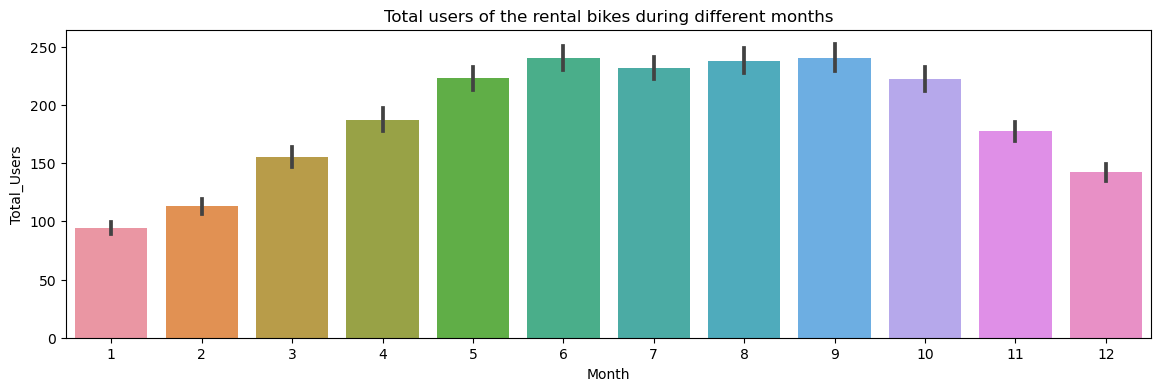

In [12]:
fig, ax = plt.subplots(figsize=(14,4))
sns.barplot(data=bike_rental, x='Month', y='Total_Users', ax=ax)
ax.set(title='Total users of the rental bikes during different months')

#### Working Daywise monthly users count split

/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Total_Users'>

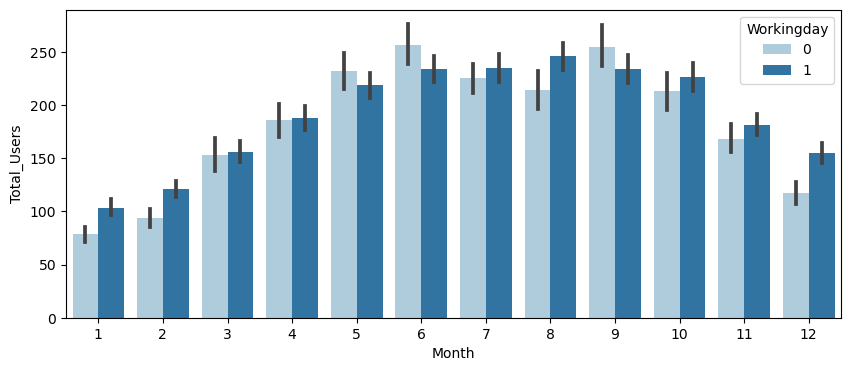

In [13]:
plt.figure(figsize=(10,4))
sns.barplot('Month','Total_Users',hue='Workingday',data=bike_rental, palette='Paired')
# sns.countplot(data=bike_rental ,x='Month',hue='Holiday',palette='Blues')
# plt.show()

/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Total_Users'>

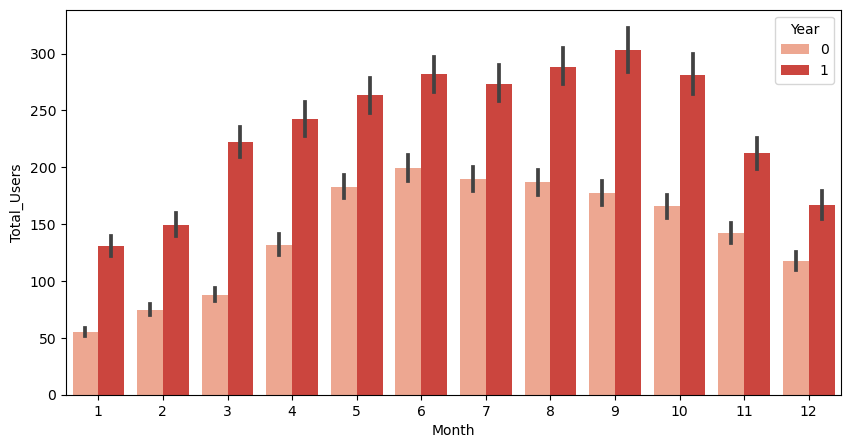

In [14]:
plt.figure(figsize=(10,5))
sns.barplot('Month','Total_Users',hue='Year',data=bike_rental,palette='Reds')

#### d) Weekly Distribution:
- 0:Mon
- 1:Tue
- 2:Wed
- 3:Thu
- 4:Fri
- 5:Sat
- 6:Sun

[Text(0.5, 1.0, 'Total users of the rental bikes during weekdays')]

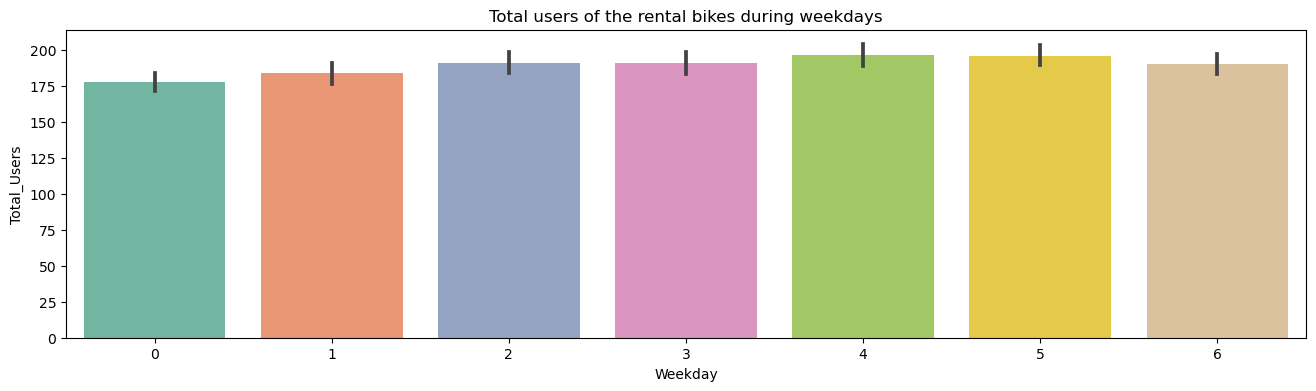

In [15]:
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(data=bike_rental, x='Weekday', y='Total_Users', ax=ax, palette = "Set2")
ax.set(title='Total users of the rental bikes during weekdays')

#### e) Hourly Distribution:
- Trend Analysis Of Hourly Based Total Users Using The Rental Bike Service on Weekdays

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered Users')]

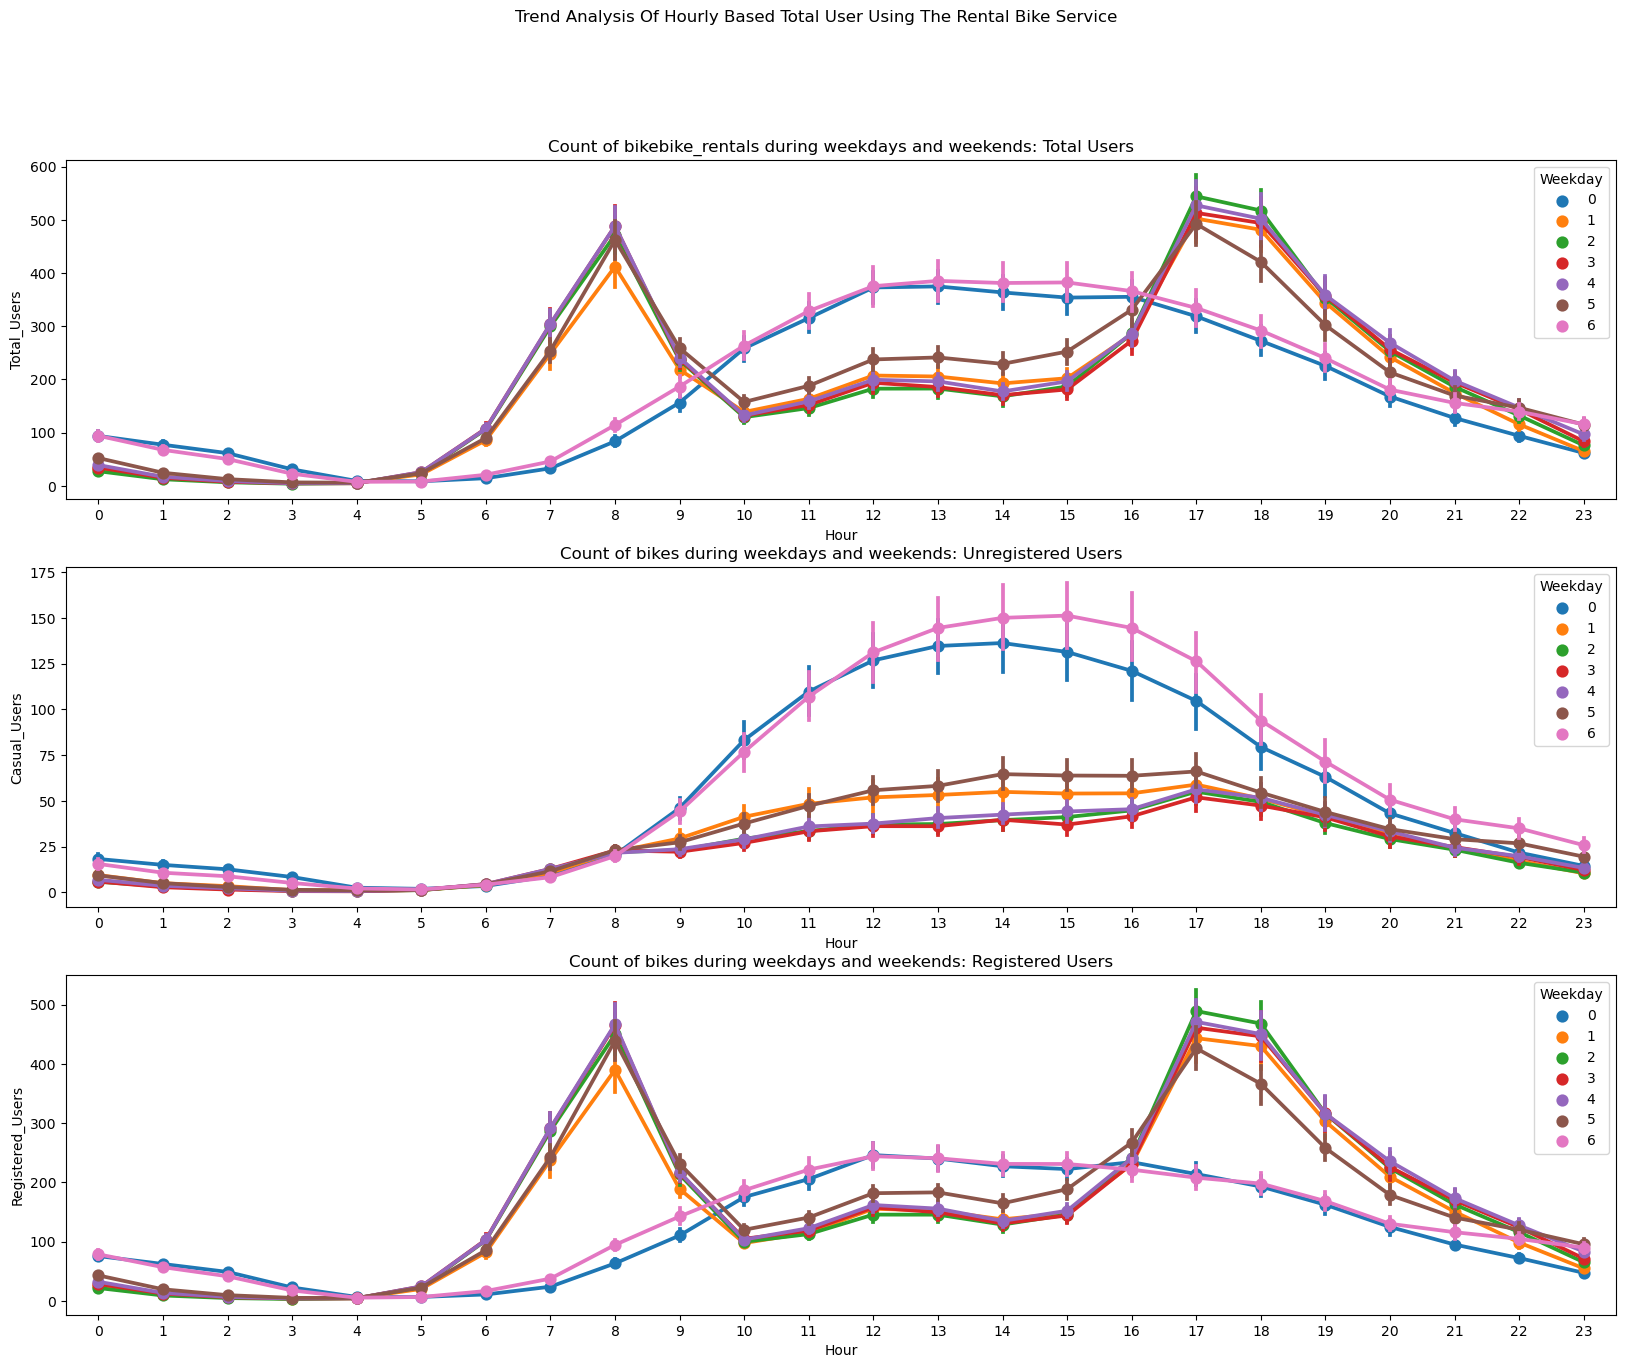

In [16]:
#Trend Analysis Of Hourly Based Total Users Using The Rental Bike Service

f, axes=plt.subplots(3,figsize=(20,15),facecolor='white')
f.suptitle('Trend Analysis Of Hourly Based Total User Using The Rental Bike Service')
ax1 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Weekday', ax=axes[0])
ax2 = sns.pointplot(data=bike_rental, x='Hour', y='Casual_Users', hue='Weekday', ax=axes[1])
ax3 = sns.pointplot(data=bike_rental, x='Hour', y='Registered_Users', hue='Weekday', ax=axes[2])

ax1.set(title='Count of bikebike_rentals during weekdays and weekends: Total Users')
ax2.set(title='Count of bikes during weekdays and weekends: Unregistered Users')
ax3.set(title='Count of bikes during weekdays and weekends: Registered Users')

#### c) Seasonal Distribution : 
 - 1: Winter
 - 2: Spring 
 - 3: Summer
 - 4: Fall
 

[Text(0.5, 1.0, 'Total users of the rental bikes during weekdays')]

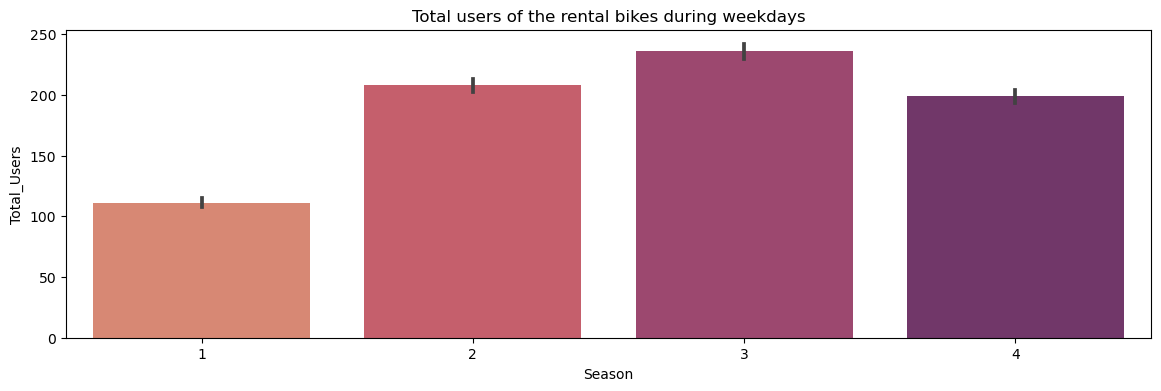

In [17]:
fig, ax = plt.subplots(figsize=(14,4))
# cols = ['grey' if (x < max(bike_rental['Total_Users'])) else 'orange' for x in bike_rental['Total_Users']]
sns.barplot(data=bike_rental, x='Season', y='Total_Users', ax=ax, palette = "flare")
ax.set(title='Total users of the rental bikes during weekdays')

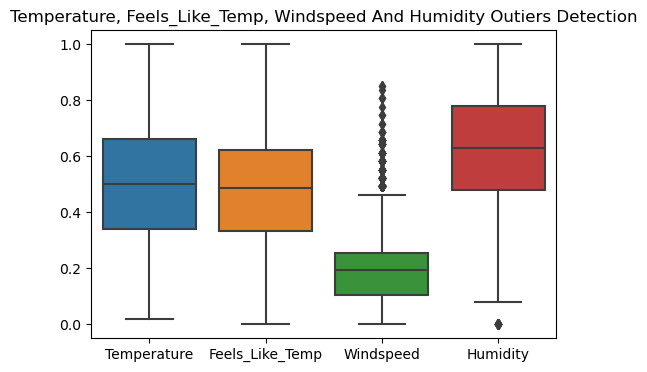

In [18]:
fig,ax=plt.subplots(figsize=(6,4))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_rental[['Temperature','Feels_Like_Temp','Windspeed','Humidity']])
ax.set_title('Temperature, Feels_Like_Temp, Windspeed And Humidity Outiers Detection')
plt.show()

From the above box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

#### Treating the windspeed and humidity variable's outlier

In [19]:
#Create dataframe for outliers
wind_hum=pd.DataFrame(bike_rental,columns=['Windspeed','Humidity'])

#Cnames for outliers                     
cnames=['Windspeed','Humidity']       
                      
for i in cnames:
    q75,q25 = np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr = q75-q25 #Inter quantile range
    min = q25-(iqr*1.5) #inner fence
    max = q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['Windspeed']=wind_hum['Windspeed'].fillna(wind_hum['Windspeed'].mean())
wind_hum['Humidity']=wind_hum['Humidity'].fillna(wind_hum['Humidity'].mean())

In [20]:
#Replacing the imputated windspeed
bike_rental['Windspeed']=bike_rental['Windspeed'].replace(wind_hum['Windspeed'])
#Replacing the imputated humidity
bike_rental['Humidity']=bike_rental['Humidity'].replace(wind_hum['Humidity'])

### Weather Conditions:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

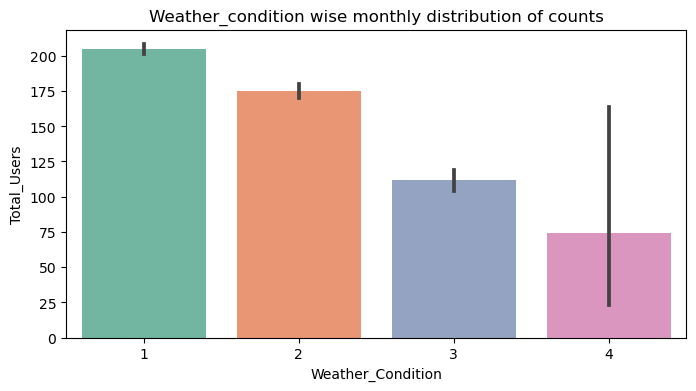

In [21]:
fig,ax1=plt.subplots(figsize=(8,4))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='Weather_Condition',y='Total_Users',data=bike_rental[['Month','Total_Users','Weather_Condition']],ax=ax1, palette = "Set2")
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

#### Trend Analysis Of Seasonality and Holiday's Hourly Based Total Users Using The Rental Bike Service 

[Text(0.5, 1.0, 'Total Users Of Bike_Rentals Based On The Holiday vs Non-Holiday')]

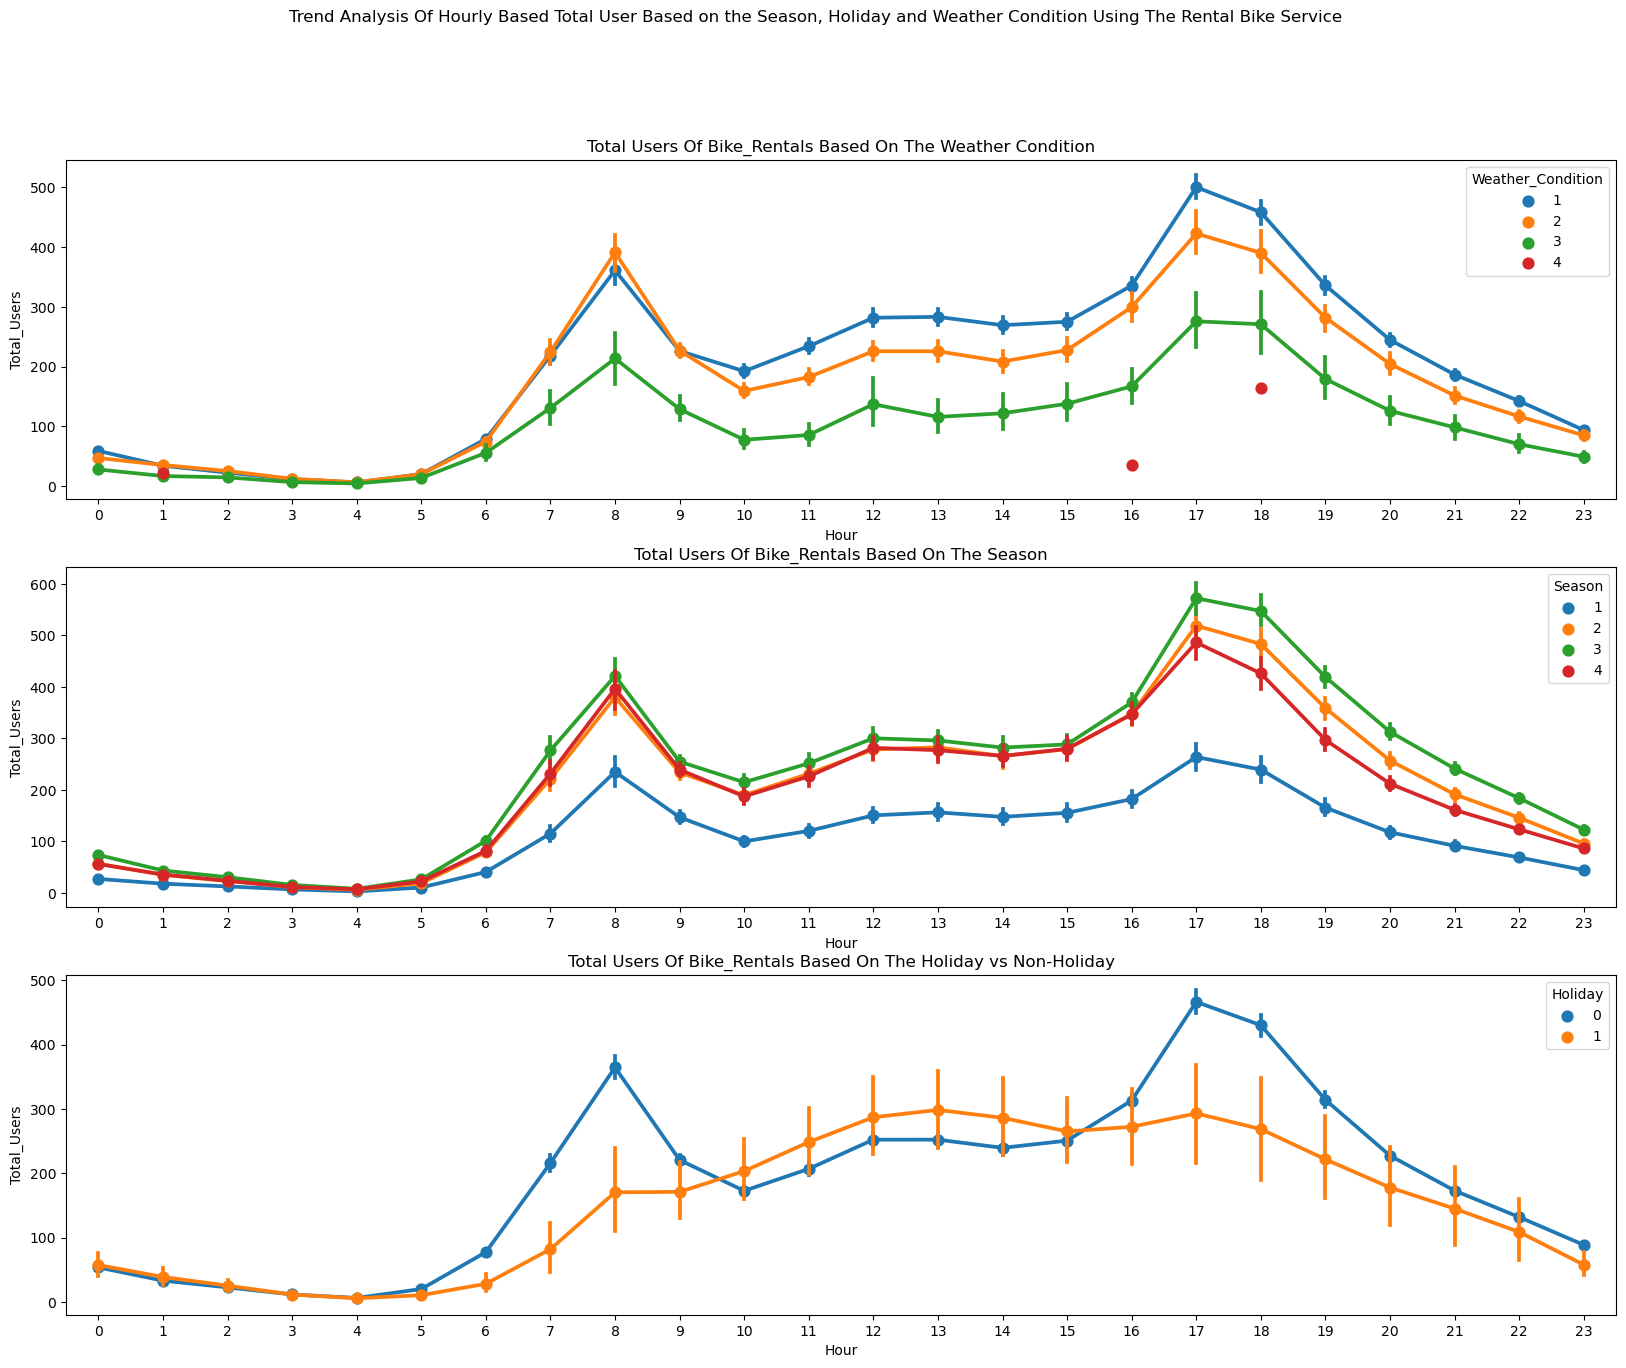

In [22]:
#Trend Analysis Of Hourly Based Total Users Using The Rental Bike Service

f, axes=plt.subplots(3,figsize=(20,15),facecolor='white')
f.suptitle('Trend Analysis Of Hourly Based Total User Based on the Season, Holiday and Weather Condition Using The Rental Bike Service')
ax1 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Weather_Condition', ax=axes[0])
ax2 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Season', ax=axes[1])
ax3 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Holiday', ax=axes[2])

ax1.set(title='Total Users Of Bike_Rentals Based On The Weather Condition')
ax2.set(title='Total Users Of Bike_Rentals Based On The Season')
ax3.set(title='Total Users Of Bike_Rentals Based On The Holiday vs Non-Holiday')

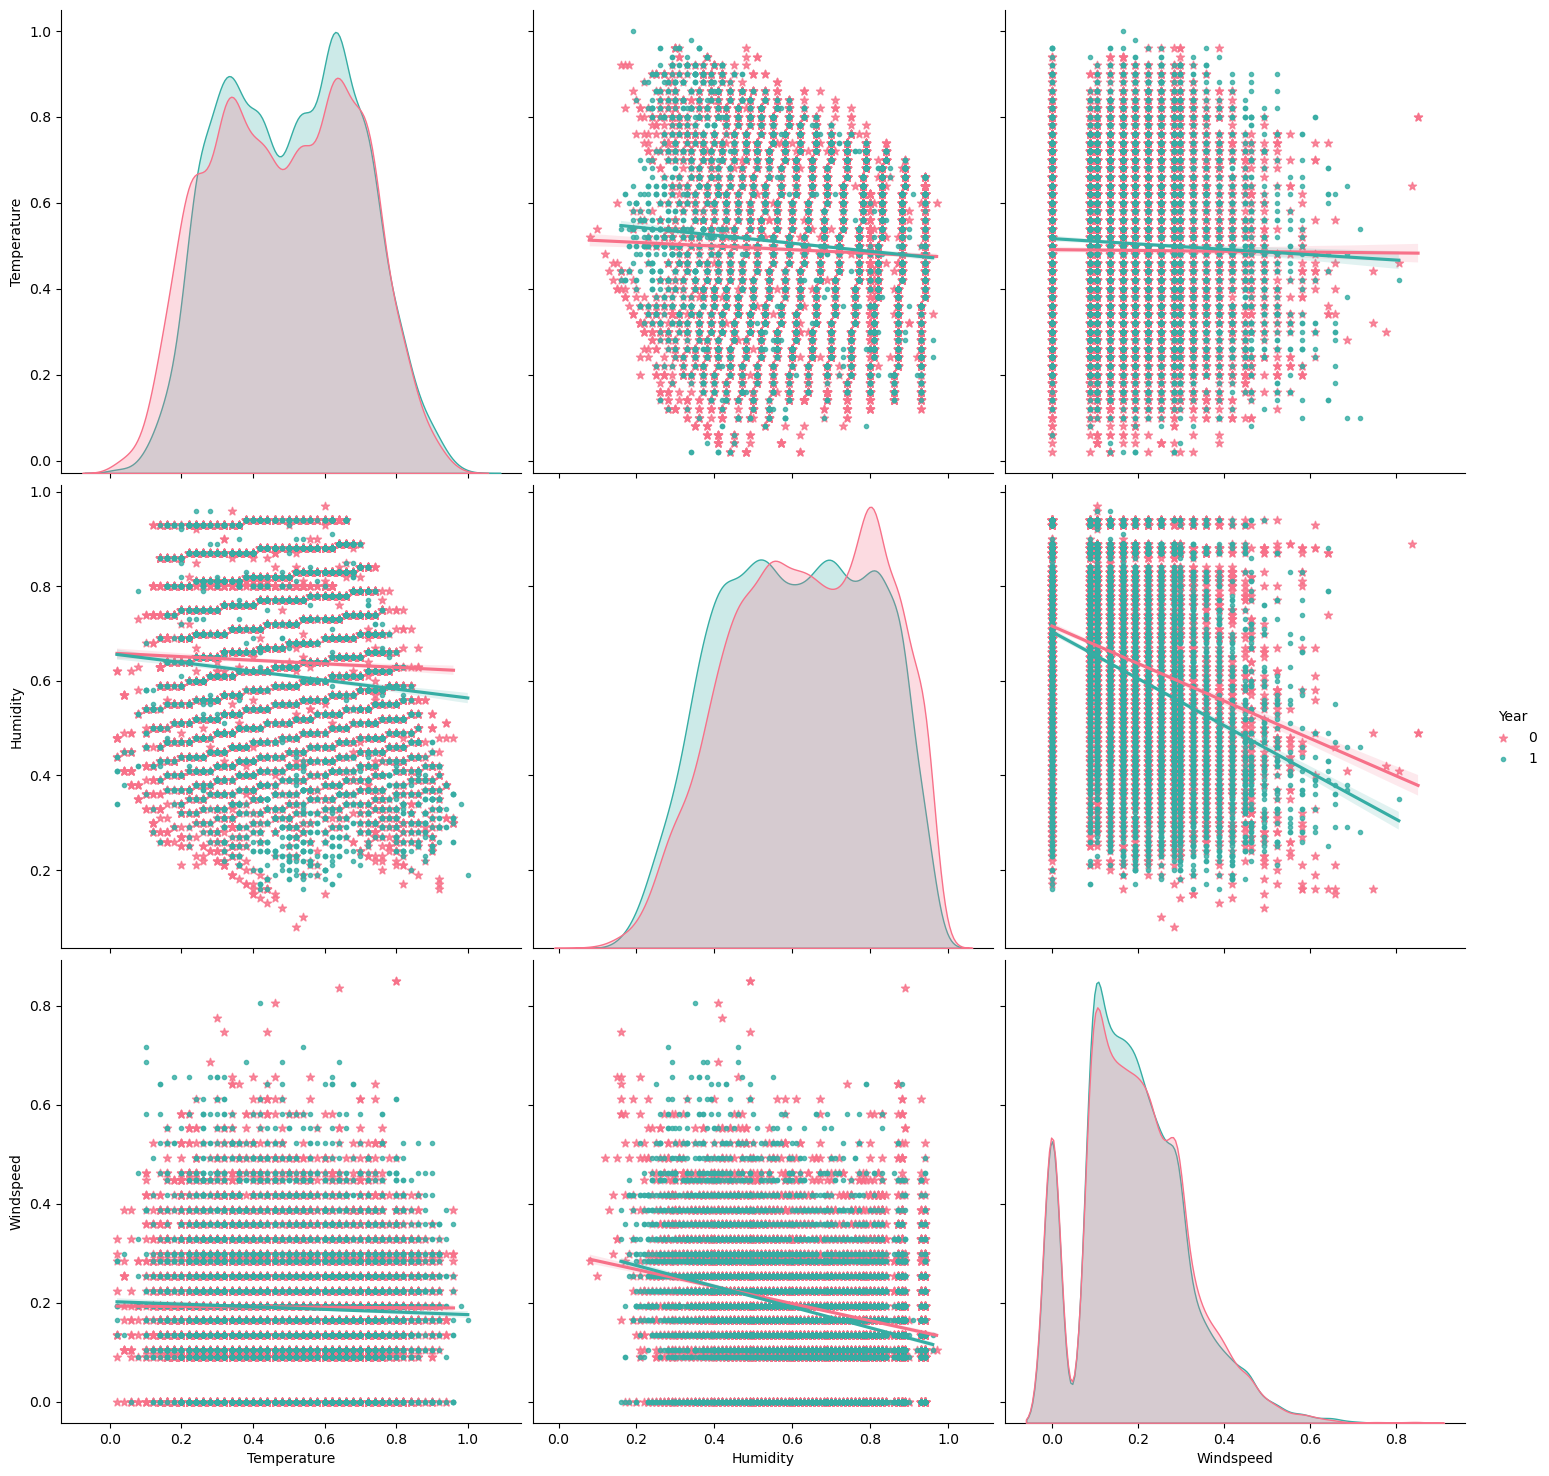

In [23]:
sns.pairplot(data = bike_rental, vars=['Temperature', 'Humidity', 'Windspeed'], 
             hue='Year', kind='reg', diag_kind='kde', markers=['*','.'], height=5, palette='husl')

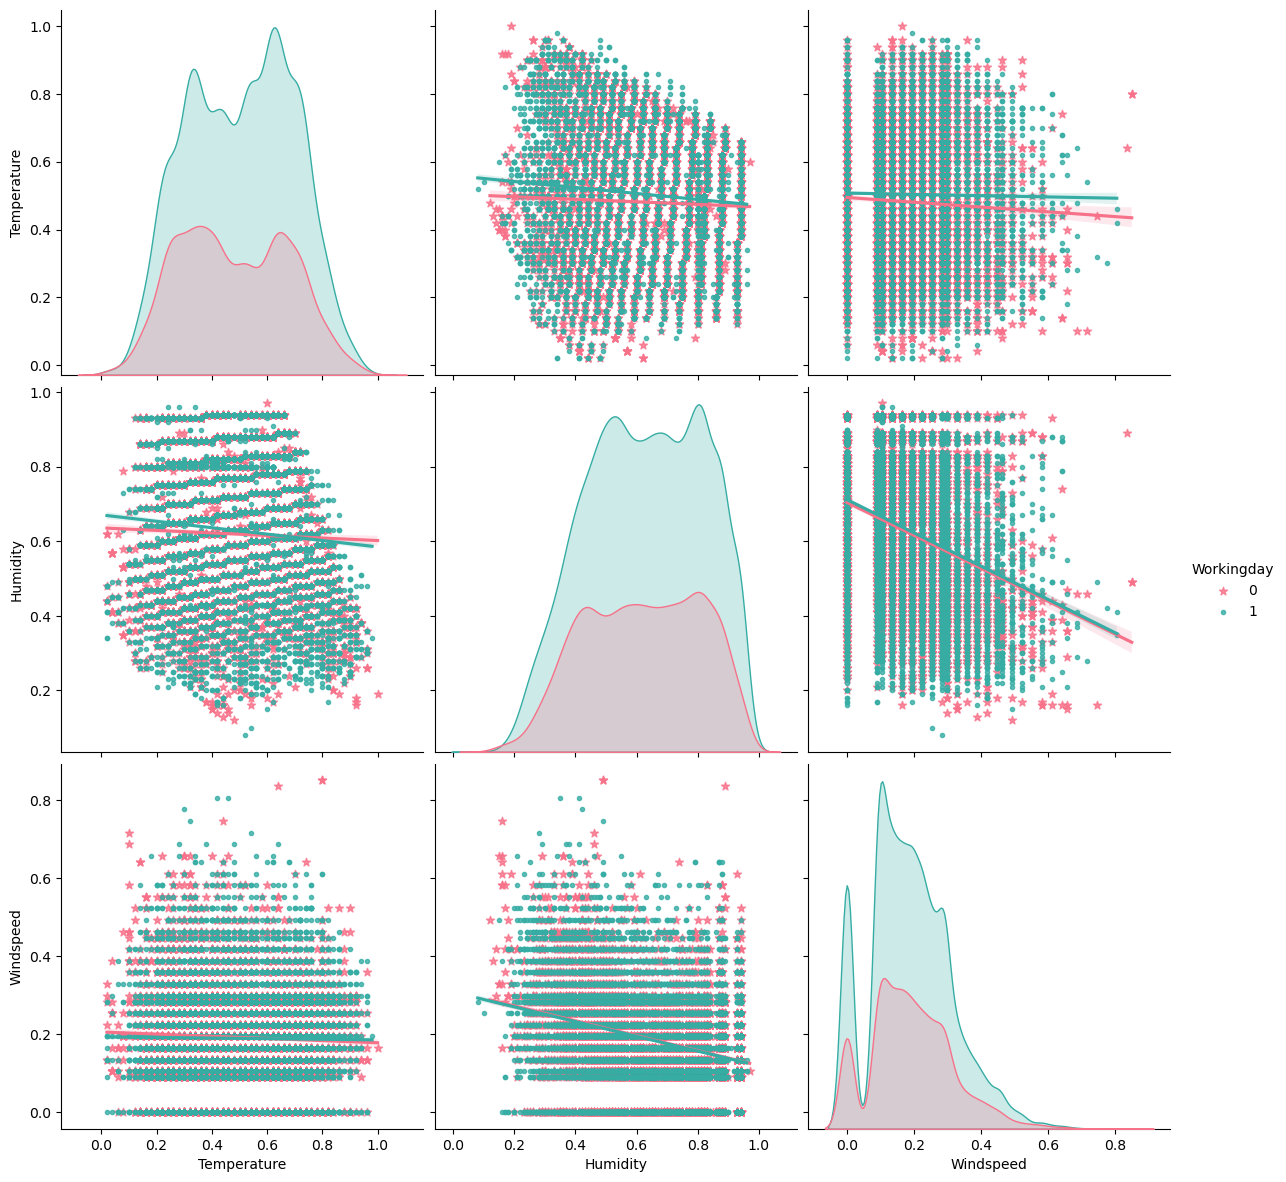

In [24]:
sns.pairplot(data = bike_rental, vars=['Temperature', 'Humidity', 'Windspeed'], 
             hue='Workingday', kind='reg', diag_kind='kde', markers=['*','.'], height=4, palette='husl')

#### Distribution Plot of Weather Conditions And Total Users

/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

[Text(0.5, 1.0, 'Distriution Plot Based On The Total_Users')]

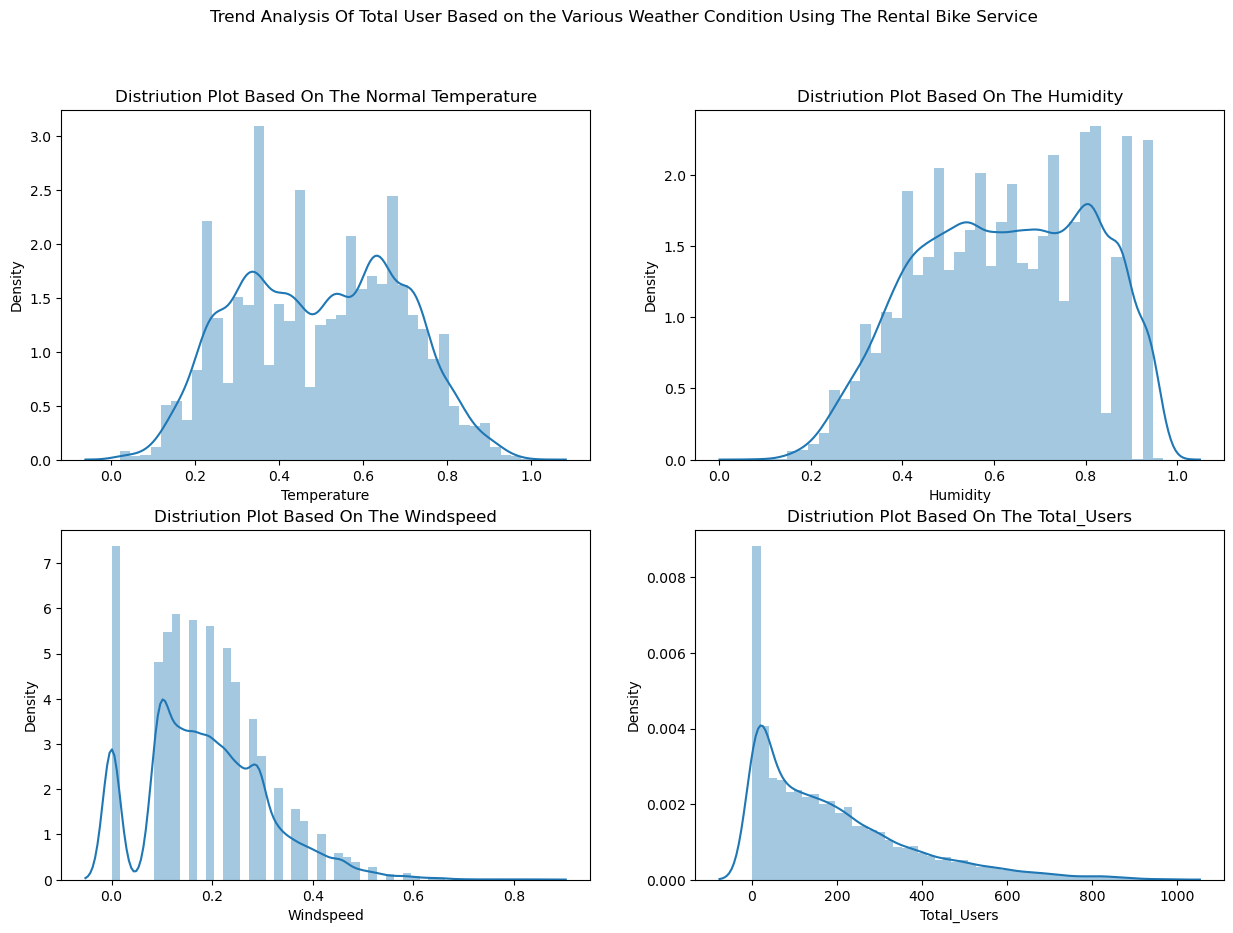

In [25]:
f, axes=plt.subplots(2,2,figsize=(15,10),facecolor='white')
f.suptitle('Trend Analysis Of Total User Based on the Various Weather Condition Using The Rental Bike Service')
ax1 = sns.distplot(bike_rental['Temperature'], ax = axes[0,0])
ax2 = sns.distplot(bike_rental['Humidity'], ax = axes[0,1])
ax3 = sns.distplot(bike_rental['Windspeed'], ax = axes[1,0])
ax4 = sns.distplot(bike_rental['Total_Users'], ax = axes[1,1])

ax1.set(title='Distriution Plot Based On The Normal Temperature')
ax2.set(title='Distriution Plot Based On The Humidity')
ax3.set(title='Distriution Plot Based On The Windspeed')
ax4.set(title='Distriution Plot Based On The Total_Users')


# Data Wrangling/ Feature Engineering

### Checking Correlation

<AxesSubplot:>

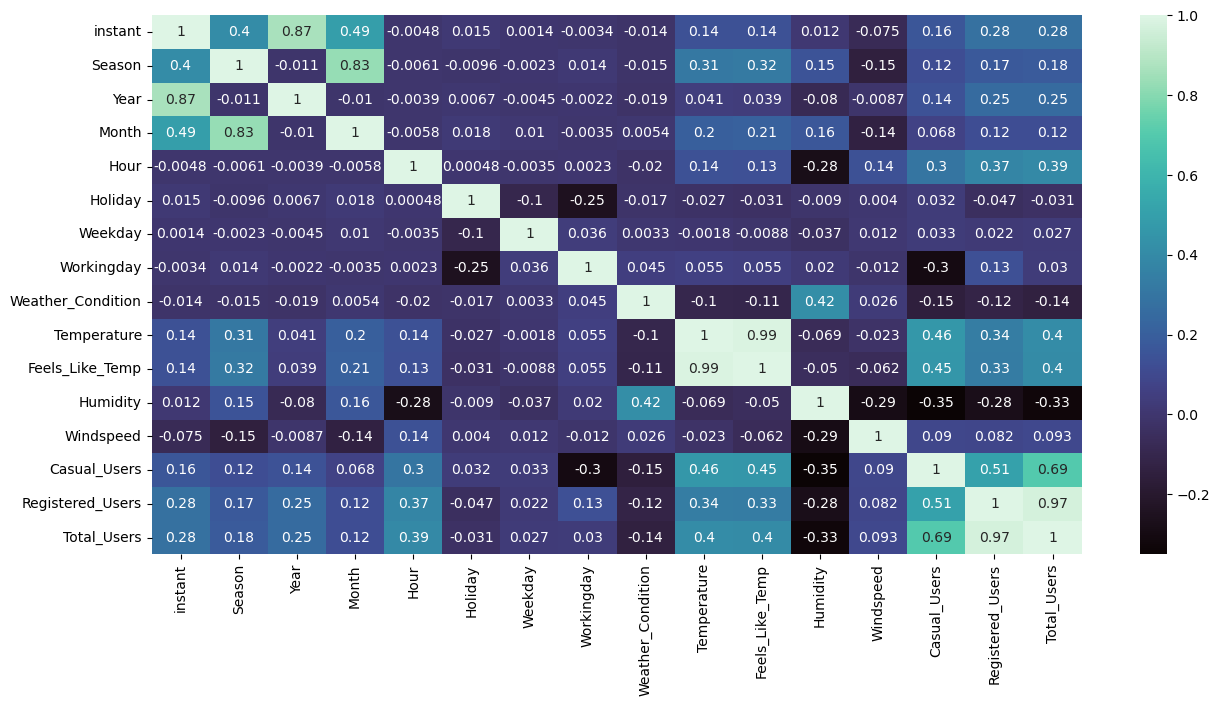

In [26]:
corr_matrix = bike_rental.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, cmap = 'mako', annot_kws={'size':10})

We can see from the correlation plot that certain characteristics are favorably connected while others are negatively correlated. The Temperature and Feels_Like_Temp are significantly positively connected, indicating that they are carrying the same information. Total Users, Casual Users, and Registered Users are all substantially positively connected. As a result, we will disregard Feels_Like_Temp, Casual Users, and Registered Users variables in addition to instance.

### Dropping the highly collinear columns

In [27]:
bike_rental = bike_rental.drop(['instant','dteday','Feels_Like_Temp','Casual_Users','Registered_Users'], axis=1)

In [28]:
bike_rental.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Humidity,Windspeed,Total_Users
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


### Feature Selection

In [29]:
X = bike_rental[bike_rental.columns.difference(["Total_Users"])] #independent columns
X.shape

(17379, 11)

In [30]:
y=bike_rental['Total_Users'] #target column i.e price range

In [31]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores['Score']=featureScores['Score'].round(0)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs    Score
1                Hour  27475.0
3               Month   2137.0
7             Weekday   1134.0
10               Year    941.0
4              Season    793.0
0             Holiday    628.0
9          Workingday    380.0
5         Temperature    309.0
6   Weather_Condition    290.0
2            Humidity    171.0


<AxesSubplot:xlabel='Specs', ylabel='Score'>

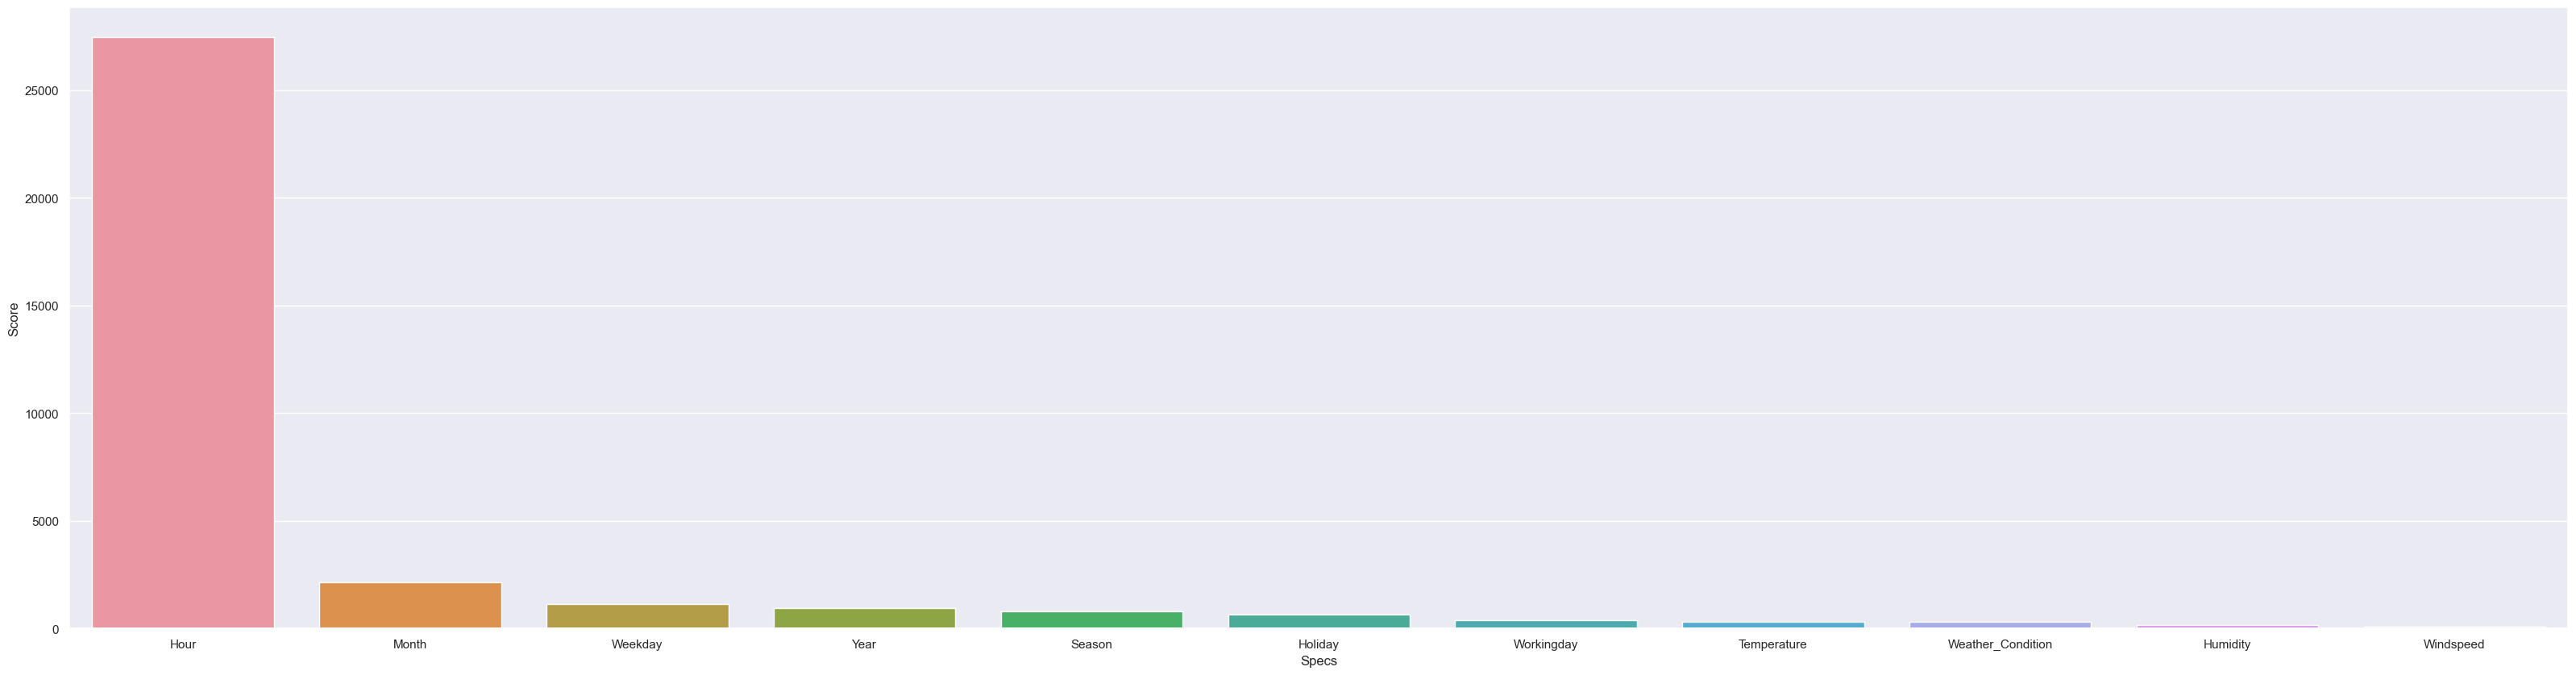

In [32]:
sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x=featureScores.nlargest(20,'Score').Specs, y=featureScores.nlargest(20,'Score').Score)

[0.00356405 0.55898339 0.03689049 0.0231579  0.04077376 0.12132971
 0.02305294 0.01464795 0.01097006 0.08898453 0.07764522]


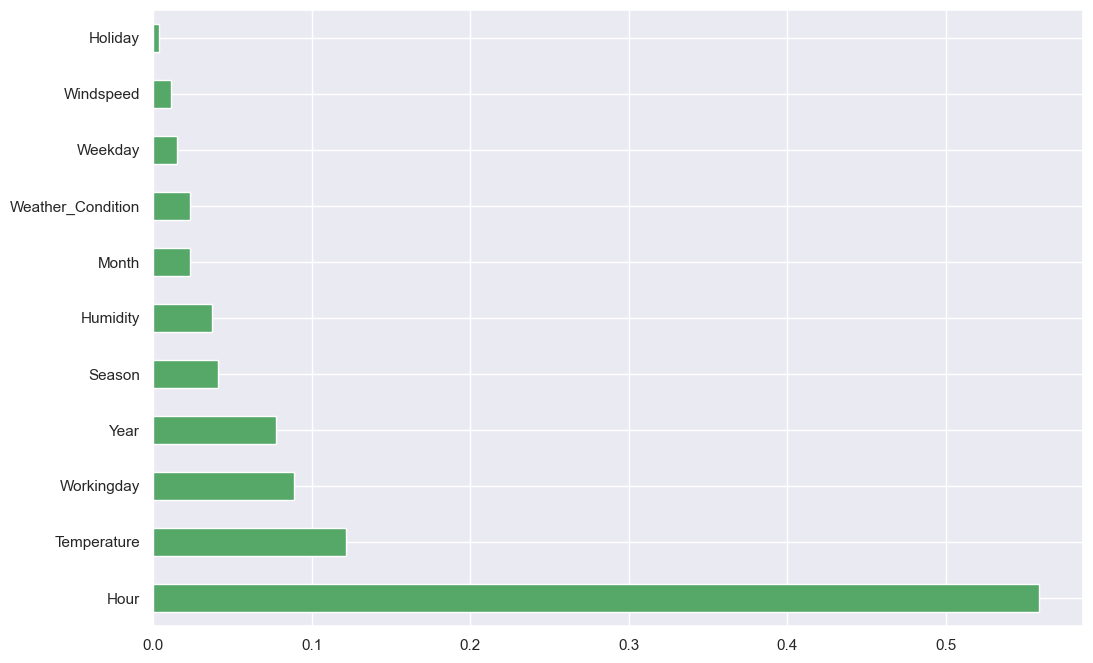

In [33]:
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'g')
plt.show()

# Model Implementation

#### Splitting the dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    # 70% train, 30% test

In [35]:
X_train.shape

(12165, 11)

In [36]:
X_test.shape

(5214, 11)

In [37]:
y_train.shape

(12165,)

In [38]:
y_test.shape

(5214,)

#### Standardizing the Dataset

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [40]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square: ', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [41]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [42]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelKNN = KNeighborsRegressor(n_neighbors=5)


# Evalution matrix for all the algorithms

MM = [modelmlg, modelRE ,modelLO, modeldcr, modelrfr, modelKNN]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 106.923
Mean Squared Error (MSE): 20781.547
Root Mean Squared Error (RMSE): 144.158
R2_score: 0.381666
Root Mean Squared Log Error (RMSLE): 4.971
Mean Absolute Percentage Error (MAPE): 322.69 %
Adj R Square:  0.381274
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 106.923
Mean Squared Error (MSE): 20781.558
Root Mean Squared Error (RMSE): 144.158
R2_score: 0.381666
Root Mean Squared Log Error (RMSLE): 4.971
Mean Absolute Percentage Error (MAPE): 322.69 %
Adj R Square:  0.381274
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 106.901
Mean Squared Error (MSE): 20782.491
Root Mean Squared Error (RMSE): 144.161
R2_score: 0.381638
Root Mean Squared Log Error (RMSLE): 4.971
Mean Absolute Percentage Error (MAPE

/var/folders/h0/tm1gdm4s34j097dtf8f7nj440000gn/T/ipykernel_54258/3900266725.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
/var/folders/h0/tm1gdm4s34j097dtf8f7nj440000gn/T/ipykernel_54258/3900266725.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
/var/folders/h0/tm1gdm4s34j097dtf8f7nj440000gn/T/ipykernel_54258/3900266725.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
/var/folders/h0/tm1gdm4s34j097dtf8f7nj440000gn/T/ipykernel_54258/3900266725.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 25.564
Mean Squared Error (MSE): 1869.742
Root Mean Squared Error (RMSE): 43.241
R2_score: 0.944368
Root Mean Squared Log Error (RMSLE): 3.767
Mean Absolute Percentage Error (MAPE): 30.98 %
Adj R Square:  0.944333
------------------------------------------------------------------------------------------------------------


/var/folders/h0/tm1gdm4s34j097dtf8f7nj440000gn/T/ipykernel_54258/3900266725.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 73.347
Mean Squared Error (MSE): 12486.132
Root Mean Squared Error (RMSE): 111.741
R2_score: 0.628488
Root Mean Squared Log Error (RMSLE): 4.716
Mean Absolute Percentage Error (MAPE): 179.15 %
Adj R Square:  0.628253
------------------------------------------------------------------------------------------------------------


/var/folders/h0/tm1gdm4s34j097dtf8f7nj440000gn/T/ipykernel_54258/3900266725.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Users', ylabel='Density'>

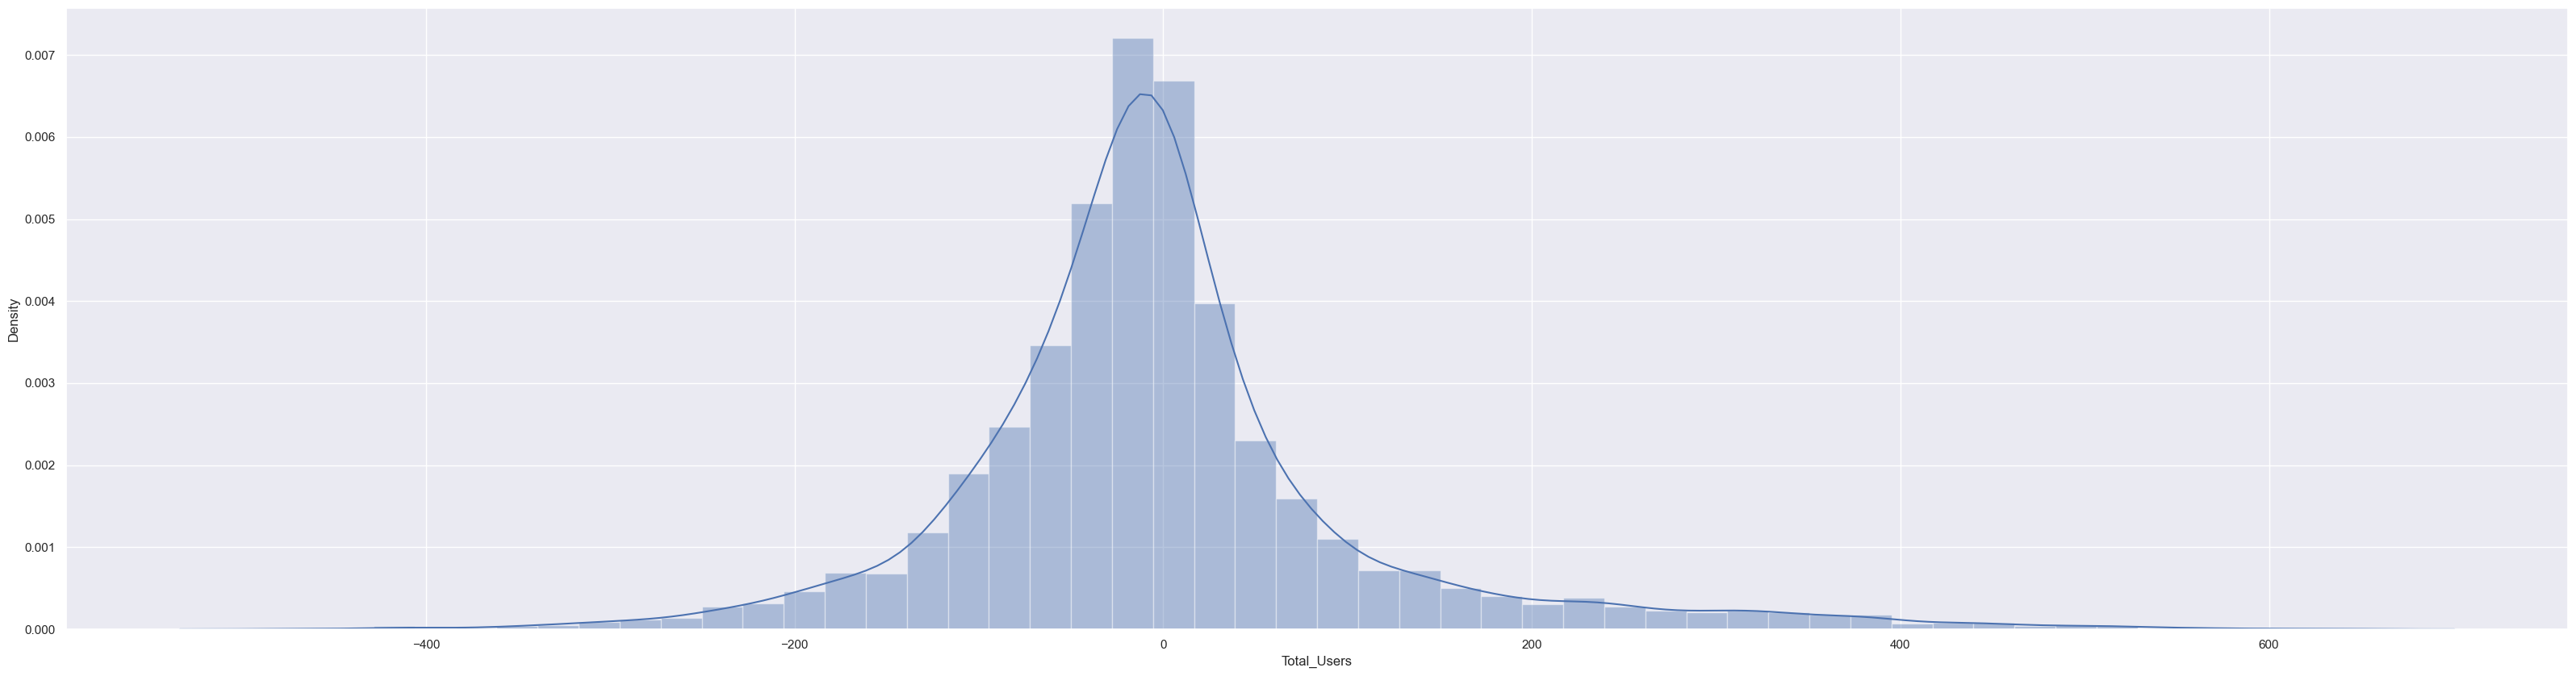

In [43]:
sns.distplot(y_test-y_pred)

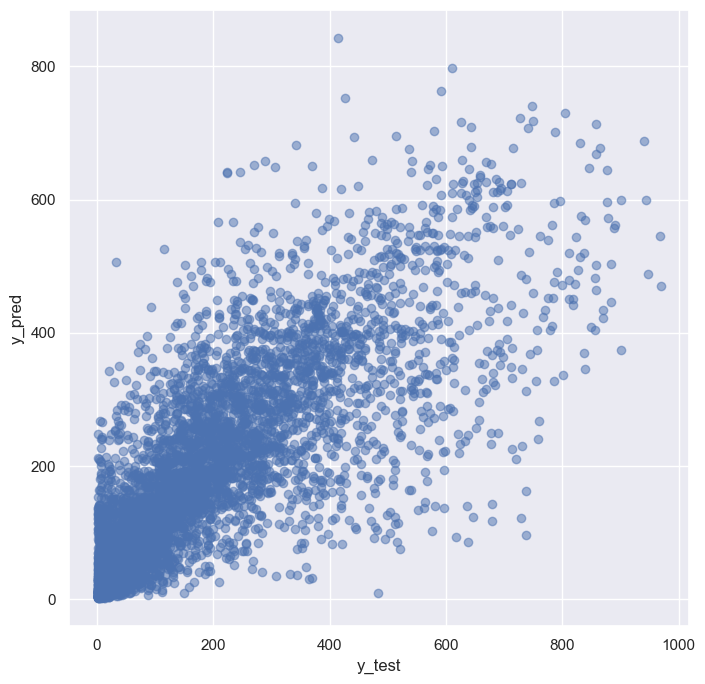

In [44]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [45]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),106.923066,0.381274,144.158063,322.687663,20781.547188,4.970910,0.381666
1,Ridge(),106.922785,0.381274,144.158102,322.691278,20781.558390,4.970911,0.381666
2,Lasso(alpha=0.1),106.901354,0.381246,144.161337,322.635006,20782.491122,4.970933,0.381638
3,DecisionTreeRegressor(),35.105102,0.893081,59.926147,39.676917,3591.143076,4.093113,0.893149
4,"(DecisionTreeRegressor(max_features='auto', ra...",25.563923,0.944333,43.240509,30.976792,1869.741661,3.766778,0.944368
5,KNeighborsRegressor(),73.347142,0.628253,111.741363,179.153846,12486.132229,4.716187,0.628488


In [46]:
models=['LinearRegression','Ridge Regression','Lasso Regression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.944333,25.563923,43.240509,30.976792,1869.741661,3.766778,0.944368
1,DecisionTreeRegressor,0.893081,35.105102,59.926147,39.676917,3591.143076,4.093113,0.893149
2,KNeighborsRegressor,0.628253,73.347142,111.741363,179.153846,12486.132229,4.716187,0.628488
3,LinearRegression,0.381274,106.923066,144.158063,322.687663,20781.547188,4.970910,0.381666
4,Ridge Regression,0.381274,106.922785,144.158102,322.691278,20781.558390,4.970911,0.381666
5,Lasso Regression,0.381246,106.901354,144.161337,322.635006,20782.491122,4.970933,0.381638


In [56]:
#Trainig the model with
fit_lr = modelmlg.fit(X_train, y_train)
# Predict the model with test data
y_pred_lr = modelmlg.predict(X_test)

fit_rg = modelRE.fit(X_train, y_train)
# Predict the model with test data
y_pred_rg = modelRE.predict(X_test)


fit_ls = modelLO.fit(X_train, y_train)
# Predict the model with test data
y_pred_ls = modelLO.predict(X_test)


fit_dt = modeldcr.fit(X_train, y_train)
# Predict the model with test data
y_pred_dt = modeldcr.predict(X_test)


fit_rf = modelrfr.fit(X_train, y_train)
# Predict the model with test data
y_pred_rf = modelrfr.predict(X_test)




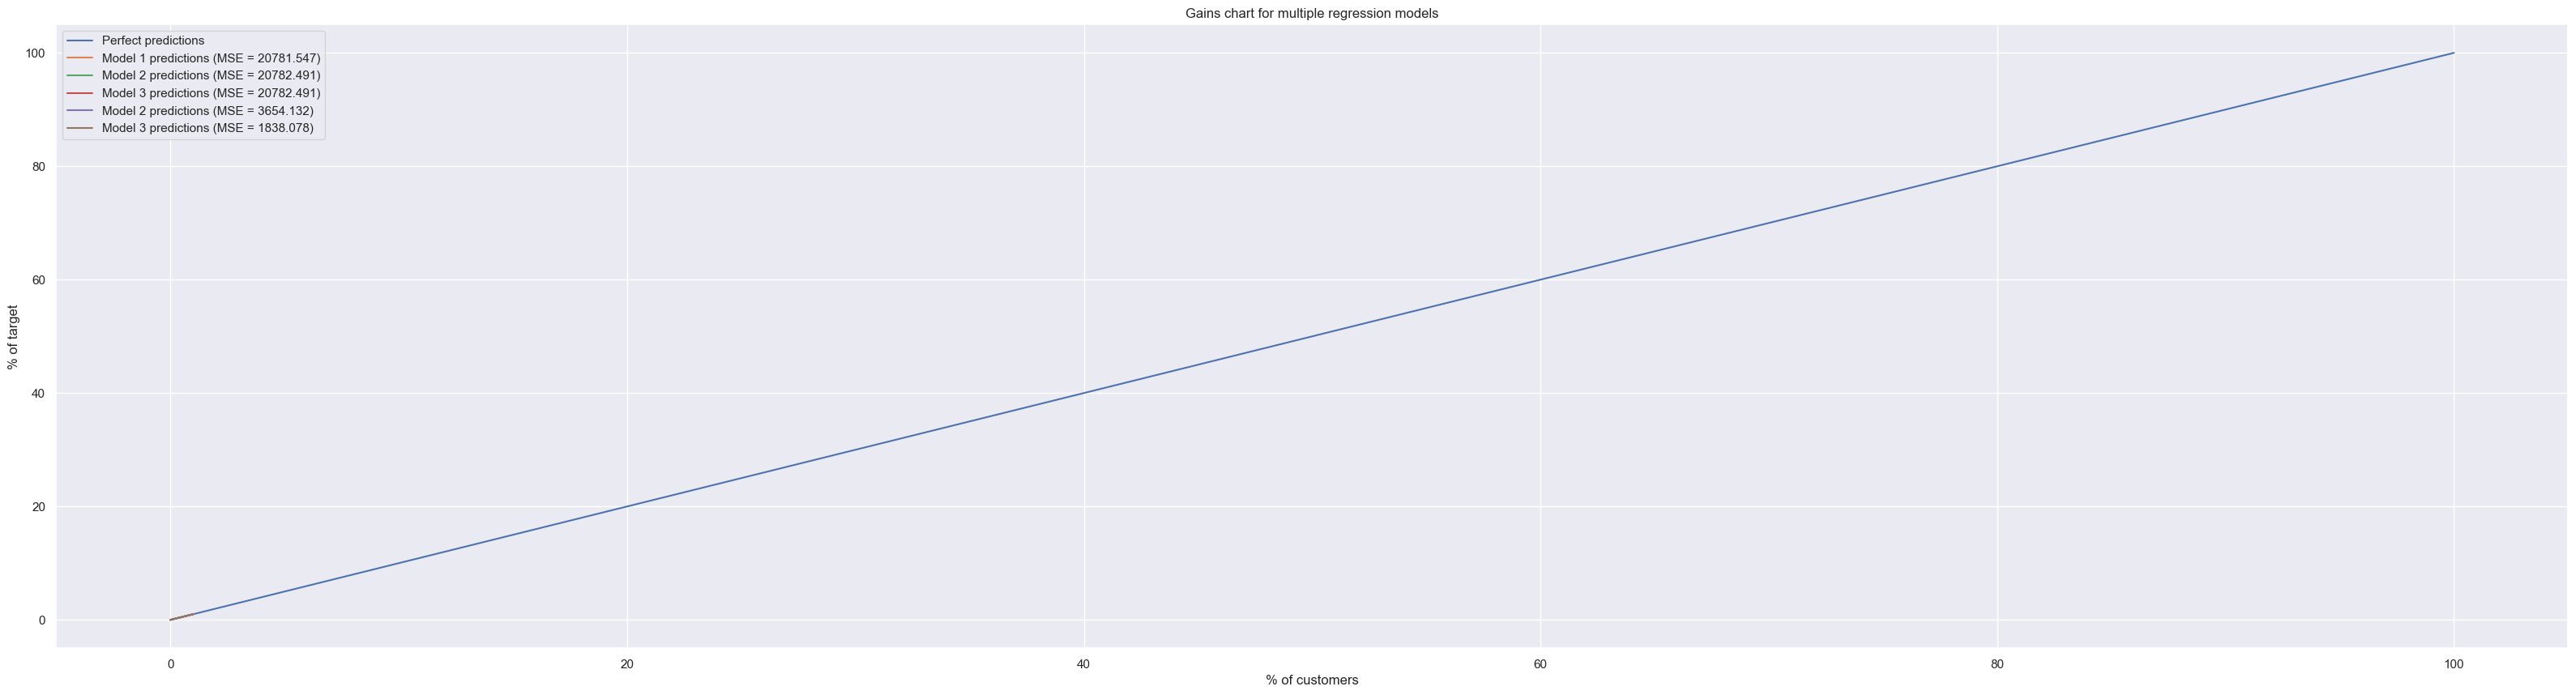

In [58]:
# calculate the mean squared error for each model
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rg = mean_squared_error(y_test, y_pred_rg)
mse_ls = mean_squared_error(y_test, y_pred_ls)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# calculate the cumulative sum of true outcomes and predicted outcomes for each model
true_cumulative = np.cumsum(y_test)
pred_cumulative_lr = np.cumsum(y_pred_lr)
pred_cumulative_rg = np.cumsum(y_pred_rg)
pred_cumulative_ls = np.cumsum(y_pred_ls)
pred_cumulative_dt = np.cumsum(y_pred_dt)
pred_cumulative_rf = np.cumsum(y_pred_rf)

# calculate the perfect predictions line
perfect_pred = np.linspace(0, 100, len(y_test))

# calculate the cumulative gains for true and predicted outcomes for each model
true_gains = true_cumulative / np.sum(y_test)
pred_gains_lr = pred_cumulative_lr / np.sum(y_pred_lr)
pred_gains_rg = pred_cumulative_rg / np.sum(y_pred_rg)
pred_gains_ls = pred_cumulative_ls / np.sum(y_pred_ls)
pred_gains_dt = pred_cumulative_dt / np.sum(y_pred_dt)
pred_gains_rf = pred_cumulative_rf / np.sum(y_pred_rf)

# plot the gains chart for all the models
plt.plot(perfect_pred, perfect_pred, label='Perfect predictions')
plt.plot(true_gains, pred_gains_lr, label='Model 1 predictions (MSE = {:.3f})'.format(mse_lr))
plt.plot(true_gains, pred_gains_rg, label='Model 2 predictions (MSE = {:.3f})'.format(mse_rg))
plt.plot(true_gains, pred_gains_ls, label='Model 3 predictions (MSE = {:.3f})'.format(mse_ls))
plt.plot(true_gains, pred_gains_dt, label='Model 2 predictions (MSE = {:.3f})'.format(mse_dt))
plt.plot(true_gains, pred_gains_rf, label='Model 3 predictions (MSE = {:.3f})'.format(mse_rf))

plt.xlabel('% of customers')
plt.ylabel('% of target')
plt.title('Gains chart for multiple regression models')
plt.legend()
plt.show()

In [49]:
out=pd.DataFrame({'Total_User_actual':y_test,'Total_User_predicted':y_pred})
result_final=bike_rental.merge(out,left_index=True,right_index=True)

In [50]:
result_final.sample(10)

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Humidity,Windspeed,Total_Users,Total_User_actual,Total_User_predicted
3343,2,0,5,5,0,2,1,2,0.58,0.94,0.2537,24,24,17.87
922,1,0,2,23,0,4,1,1,0.12,0.42,0.1045,34,34,32.91
16938,4,1,12,13,0,4,1,1,0.36,0.34,0.1940,271,271,243.79
17244,1,1,12,9,0,3,1,3,0.20,0.86,0.3284,23,23,46.91
14749,3,1,9,18,0,2,1,1,0.64,0.36,0.1642,877,877,863.47
3404,2,0,5,18,0,4,1,1,0.80,0.46,0.3284,478,478,458.72
5594,3,0,8,0,0,5,1,1,0.62,0.83,0.1343,51,51,61.39
9004,1,1,1,1,1,1,0,1,0.14,0.43,0.1045,20,20,26.80
3540,2,0,6,10,0,3,1,2,0.76,0.75,0.2537,115,115,119.44
2888,2,0,5,6,0,4,1,1,0.34,0.66,0.2537,89,89,67.11


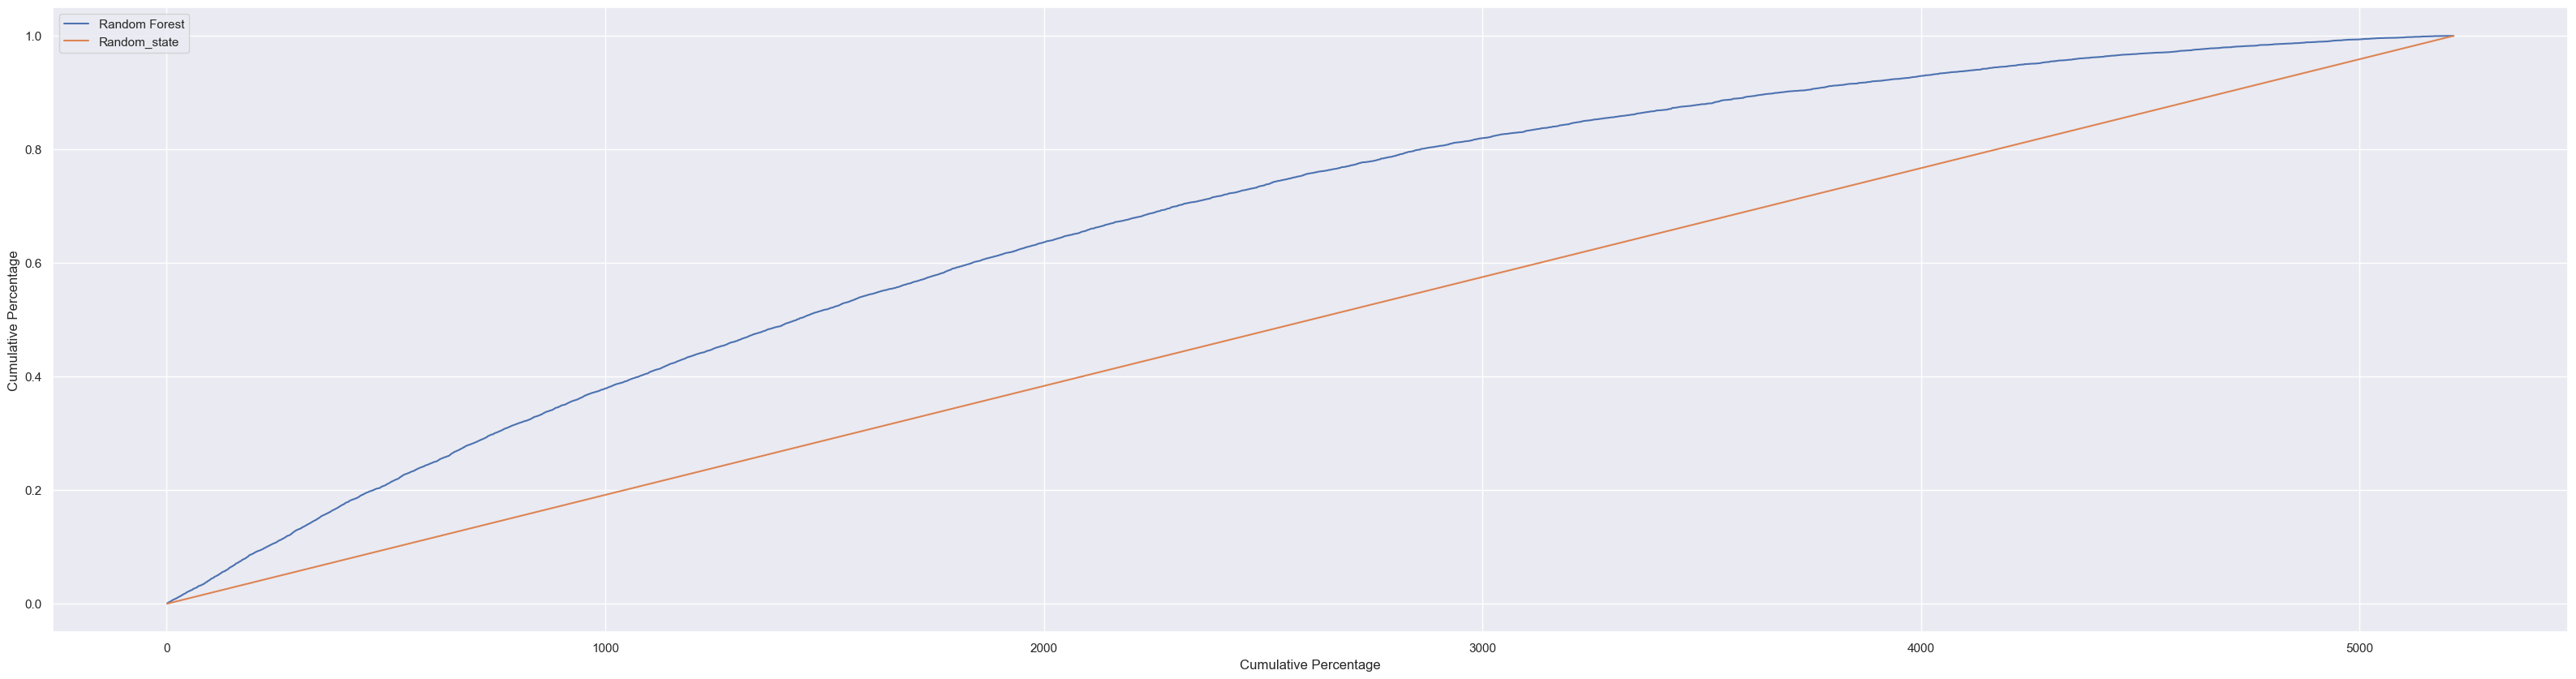

In [61]:
def calculate_cumulative_count_and_rate(y_true, y_pred):
  result_final = pd.DataFrame()
  result_final['target'] = y_test
  result_final['predicted'] = y_pred
  result_final = result_final.sort_values(by='predicted', ascending=False)

  result_final['cumulative_count'] = np.arange(1, len(result_final)+1)
  result_final['cumulative_pos'] = result_final['target'].cumsum()
  result_final['cumulative_rate'] = result_final['cumulative_pos'] / result_final['target'].sum()
  return result_final[['cumulative_count','cumulative_pos','cumulative_rate','target']]

results_rf = calculate_cumulative_count_and_rate(y_test, y_pred_lr)

random_rates = np.linspace(0, 1, len(results_lr))

plt.plot(results_rf['cumulative_count'], results_rf['cumulative_rate'], label='Random Forest')
plt.plot(results_rf['cumulative_count'], random_rates, label='Random_state')
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Percentage')
plt.legend()
plt.show()

In [51]:
# Assuming y_true is the true values of the target variable
n_bins = 10
bin_edges = np.linspace(np.min(y_test), np.max(y_test), n_bins+1)
y_binned = np.digitize(y_test, bin_edges)

# Now y_binned contains integers ranging from 1 to n_bins that represent the bin index for each observation


### Neural Network Regressor

We tried implementing NNR but since the data is not large enough and the RAM issues we were not able to obtain the results 

In [ ]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Create a sample regression dataset
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=0)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a neural network regressor with 2 hidden layers, each with 50 neurons
# regressor = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=500, random_state=42)

# # Fit the model to the training data
# regressor.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = regressor.predict(X_test)

# # Evaluate the model's performance using mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")

### Model Improvement 

#### a. Improving the skewness throught the data

In [ ]:
# Skew function of Pandas
check_skewness = bike_rental.skew().sort_values(ascending=False)
check_skewness

In [ ]:
#Log Transform
log_transformation = np.log(bike_rental["Total_Users"])
log_transformation.skew()

In [ ]:
#Square Root Transform
skrt_transformation = np.sqrt(bike_rental["Total_Users"])
skrt_transformation.skew()

In [ ]:
#Boxcox Transformation
from scipy import stats
boxcox_transformation = stats.boxcox(bike_rental["Total_Users"])[0]
pd.Series(boxcox_transformation).skew()

In [ ]:
def SqrtTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(bike_rental["Total_Users"], kde=True, color="red")
    plt.subplot(1,2,2)
    
    Total_Users_sqrt = pd.DataFrame(np.sqrt(bike_rental["Total_Users"]))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(Total_Users_sqrt, bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(check_skewness[feature],2)} before & is {round(Total_Users_sqrt.skew()[0],2)} after Skrt transformation.")
    
SqrtTrans(feature="Total_Users")

In [ ]:
bike_rental["Total_Users_Sqrt_Transformed"] = pd.DataFrame(np.sqrt(bike_rental["Total_Users"]))

In [ ]:
sns.displot(bike_rental["Total_Users_Sqrt_Transformed"],kde=True)
plt.show()

In [ ]:
bike_rental = bike_rental.drop(["Total_Users_Sqrt_Transformed"], axis = 1)

### Model Implementation - After Transformation

In [ ]:
X_new = bike_rental[bike_rental.columns.difference(["Total_Users_Sqrt_Transformed"])] #independent columns
X_new.shape

In [ ]:
y_new = bike_rental['Total_Users'] #target column i.e price range

In [ ]:
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_new, y_new, test_size=0.3)    # 70% train, 30% test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = scaler.transform(X_test_transformed)

X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

In [ ]:
aftertrans = {'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
AfterTransformation_Results = pd.DataFrame(aftertrans)
AfterTransformation_Results.head()

In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelKNN = KNeighborsRegressor(n_neighbors=5)


# Evalution matrix for all the algorithms

MM = [modelmlg, modelRE ,modelLO, modeldcr, modelrfr, modelKNN]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train_transformed, y_train_transformed)
    
    # Predict the model with test data

    y_pred = models.predict(X_test_transformed)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test_transformed, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test_transformed, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test_transformed, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test_transformed, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test_transformed, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test_transformed, y_pred):
        y_test_transformed, y_pred = np.array(y_test_transformed), np.array(y_pred)
        return np.mean(np.abs((y_test_transformed - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test_transformed, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test_transformed, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_new)-1)/(len(y_new)-X_new.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test_transformed, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test_transformed, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test_transformed, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test_transformed, y_pred))),
               'R2_score' : metrics.r2_score(y_test_transformed, y_pred)}
    AfterTransformation_Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
AfterTransformation_Results

In [ ]:
models=['LinearRegression','Ridge Regression','Lasso Regression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor']
result = pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=AfterTransformation_Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=AfterTransformation_Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=AfterTransformation_Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=AfterTransformation_Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=AfterTransformation_Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=AfterTransformation_Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=AfterTransformation_Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

In [ ]:
#Trainig the model with
modelLO.fit(X_train_transformed, y_train_transformed)
    
# Predict the model with test data

y_pred = modelrfr.predict(X_test_transformed)

In [ ]:
transformed =pd.DataFrame({'Total_User_actual':y_test_transformed,'Total_User_predicted':y_pred})
result_aftertrans = bike_rental.merge(transformed, left_index=True,right_index=True)

In [ ]:
result_aftertrans.sample(10)

In [ ]:
# actual_aftersqrt = BikeRental_withL2R.y_test
# predicted_aftersqrt = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

# combined_users = pd.DataFrame({'Total_Actual_Users':actual_aftersqrt, 'Total_Predicted_Users':predicted_aftersqrt})
# LR_Predicted_data =bike_rental.merge(combined_users,left_index=True,right_index=True)
# LR_Predicted_data.head()

#### b. Introducting Dimensionality Reduction to check if the model's performance increases

# PCA

In [ ]:
X_remaining=bike_rental[['Season','Year','Month', 'Hour', 'Holiday', 'Weekday', 'Workingday','Weather_Condition']]
X = bike_rental[['Temperature', 'Humidity', 'Windspeed']]
y = bike_rental.iloc[::,-1]

In [ ]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
covariance_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

num_components = 1
projection_matrix = eigenvectors[:,:num_components]

X = X.dot(projection_matrix)

In [ ]:
bike_rental=pd.concat([X_remaining,X], axis=1)

In [ ]:
bike_rental=pd.concat([bike_rental,y], axis=1)

In [ ]:
bike_rental

## Bike Rental's Customer Prediction Results

Furthermore, we also treated outliers, improved further scaling and tuned hyper-parameter but there was no significant prediction enhancements, hence did not include those code sections to the file. 

Based on the amount of features and above model implementations after preprocessing, **it seems reasonable to consider the Random Forest Regressor as a baseline model for the use case at hand**

- We observed a good improvement in the performance by reducing skewness in the target variable 
- Additionally, attempts to treat the outliers did not result in better evaluation metrics or predictions, indicating that the outliers may contain valuable information for the model
- Therefore, it may be worthwhile to explore other regression models and consider additional approaches to improve the model's performance, such as hyperparameter tuning, ensemble methods, etc